In [1]:
import pandas as pd
import numpy as np

In [4]:
df_wheat = pd.read_csv('data/seeds_dataset.csv')
print(df_wheat.shape)
print(df_wheat.dtypes)
df_wheat.head(3)

(210, 8)
area              float64
perimeter         float64
compactness       float64
length            float64
width             float64
coefficient       float64
length_groove     float64
type_wheat          int64
dtype: object


,area,perimeter,compactness,length,width,coefficient,length_groove,type_wheat
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1


In [5]:
df_wheat.type_wheat.unique()

array([1, 2, 3], dtype=int64)

In [6]:
df_wheat.describe()

,area,perimeter,compactness,length,width,coefficient,length_groove,type_wheat
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [7]:
# Generamos el modelo ML

# Seleccionamos clase Naive Bayes de modelo de clasificación

from sklearn.naive_bayes import GaussianNB

In [8]:
# Dejamos los hiperparámetros del modelo por default

model = GaussianNB()

In [9]:
# Preparamos la matriz de *features* y vector *target*
# La matriz X de features son todas las variables menos type_wheat (variedad de trigo),
# que es la variable target a predecir.

X = df_wheat.drop(['type_wheat'], axis=1)
y = df_wheat['type_wheat']

In [10]:
# Separaramos los sets de entrenamiento y de testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=2)

In [11]:
# Ajustamos el modelo a los datos de entrenamiento

model.fit(Xtrain, ytrain)

GaussianNB()

In [12]:
# Con el modelo entrenado, vamos a predecir las etiquetas del conjunto de test

ypred = model.predict(Xtest)
ypred

array([1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 2, 2, 1, 3, 3, 2, 1, 2,
       1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 3, 1, 2,
       3, 1, 3, 2, 2, 3, 2, 2, 1], dtype=int64)

In [14]:
# Evaluamos la performance del modelo
# Obtenemos un valor de accuracy del 87%, es decir que 87 de cada 100 casos fueron correctamente predichos.

from sklearn.metrics import accuracy_score
round(accuracy_score(ytest, ypred), 2)

0.87

In [17]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(ytest, ypred)
cm

array([[20,  1,  1],
       [ 1, 13,  0],
       [ 4,  0, 13]], dtype=int64)

c:\Users\fcolombo\Anaconda3\envs\dsagdbasic\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


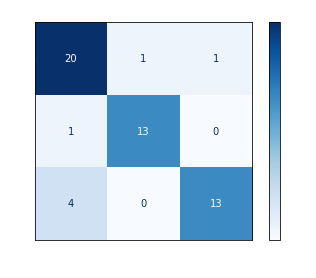

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(model, Xtest, ytest, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [21]:
# Con los datos de la matriz de confusión podemos interpretar los resultados consultando el informe de clasificación

from sklearn.metrics import classification_report
 
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.80      0.91      0.85        22
           2       0.93      0.93      0.93        14
           3       0.93      0.76      0.84        17

    accuracy                           0.87        53
   macro avg       0.89      0.87      0.87        53
weighted avg       0.88      0.87      0.87        53

